# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

<Axes: >

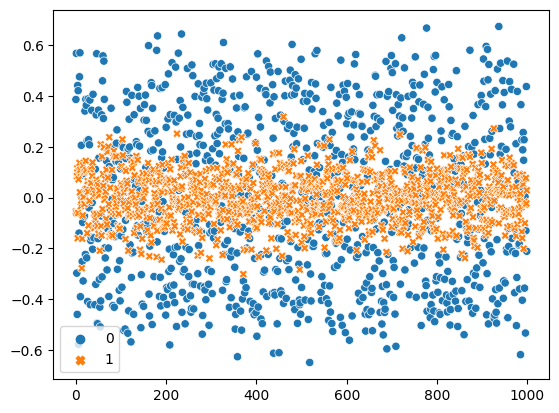

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

scaled_features = MinMaxScaler().fit_transform(data)

pca = PCA(n_components=2).fit(scaled_features)
features_pca = pca.transform(scaled_features)

sns.scatterplot(features_pca)

<Axes: xlabel='x', ylabel='y'>

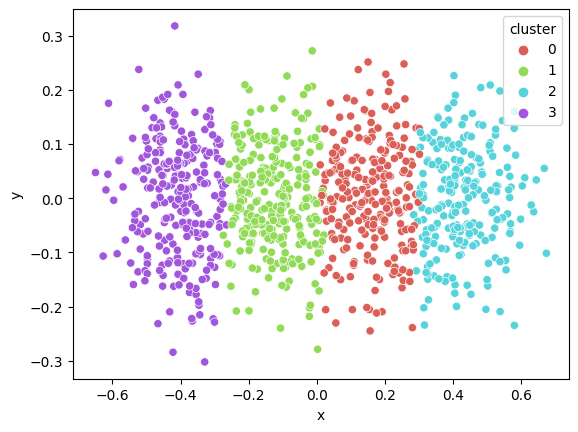

In [30]:
from sklearn.cluster import KMeans

km_number_of_clusters = 4

model = KMeans(n_clusters=km_number_of_clusters, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(data)

km_result = pd.concat([pd.DataFrame(features_pca, columns=['x', 'y']), pd.DataFrame(km_clusters, columns=['cluster'])], axis=1)
sns.scatterplot(x=km_result['x'], y=km_result['y'], hue=km_result['cluster'], palette=sns.color_palette("hls", km_number_of_clusters))

<Axes: xlabel='x', ylabel='y'>

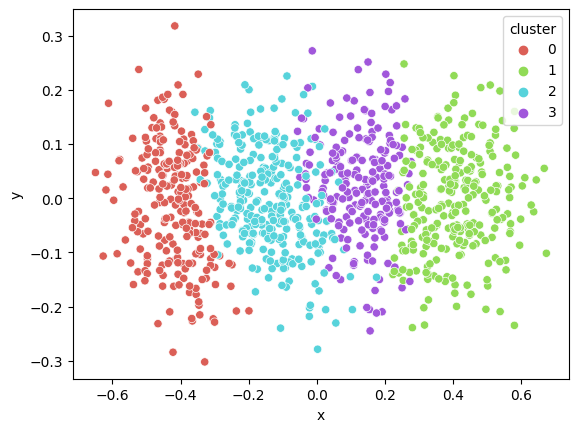

In [31]:
from sklearn.cluster import AgglomerativeClustering

number_of_clusters = 4

agg_model = AgglomerativeClustering(n_clusters=number_of_clusters)
agg_clusters = agg_model.fit_predict(data)

agg_result = pd.concat([pd.DataFrame(features_pca, columns=['x', 'y']), pd.DataFrame(agg_clusters, columns=['cluster'])], axis=1)

sns.scatterplot(x=agg_result['x'], y=agg_result['y'], hue=agg_result['cluster'], palette=sns.color_palette("hls", number_of_clusters))

<Axes: xlabel='Number of Clusters', ylabel='WCSS'>

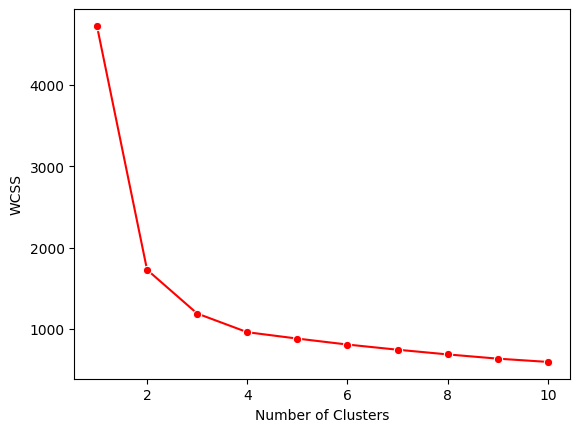

In [20]:
#wcss
km_wcss = []
for km_number_of_clusters in range(1, 11):
    km_model = KMeans(n_clusters=km_number_of_clusters, init='k-means++', n_init=100, max_iter=1000)
    km_clusters = km_model.fit_predict(data)
    km_wcss.append(km_model.inertia_)

km_wcss_df = pd.DataFrame({'Number of Clusters': range(1, 11), 'WCSS': km_wcss})
sns.lineplot(x='Number of Clusters', y='WCSS', data=km_wcss_df, marker='o', color='red')

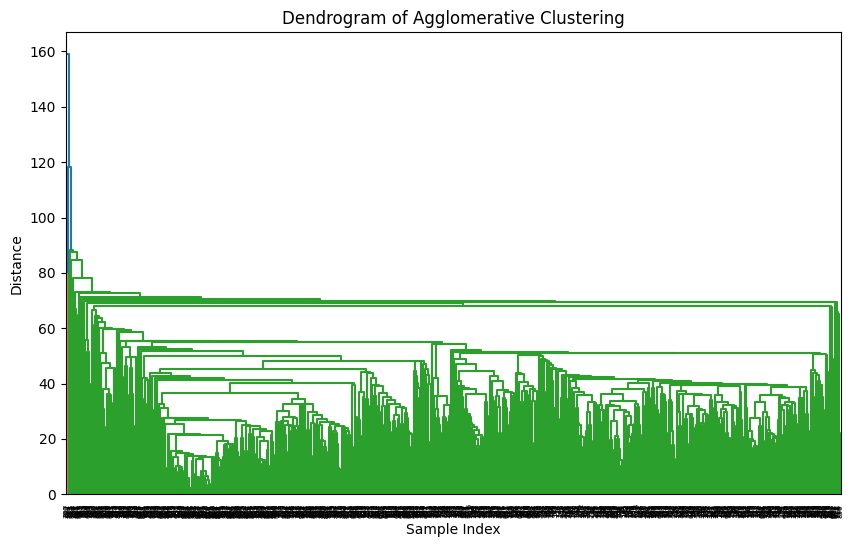

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

agg_model = AgglomerativeClustering(n_clusters=7)
agg_clusters = agg_model.fit_predict(data)

linkage_matrix = linkage(agg_model.children_)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram of Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# sns.clustermap(linkage_matrix)